# Полиномиальные модели

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [3]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [4]:
X = data.x
y = data.y
X.shape, y.shape

((100,), (100,))

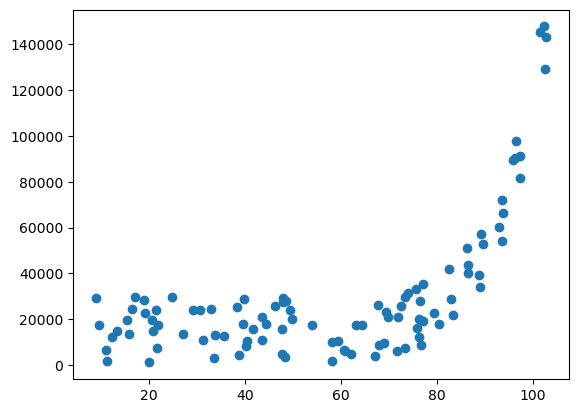

In [5]:
plt.scatter(X, y)

In [6]:
X = pd.DataFrame(X)

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


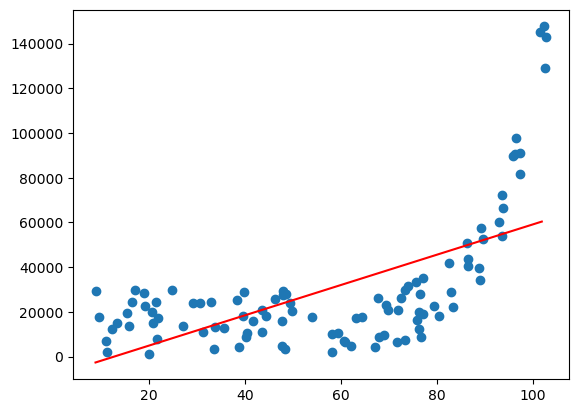

In [68]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [69]:
linear.score(X, y)

0.37467360318911636

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
transformation = PolynomialFeatures(degree=2)

In [72]:
transformation.fit(X)

PolynomialFeatures()

In [73]:
X_2 = transformation.transform(X)

In [74]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [75]:
poly_2d = LinearRegression().fit(X_2, y)

In [76]:
xx_2d = transformation.transform(pd.DataFrame(xx))

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


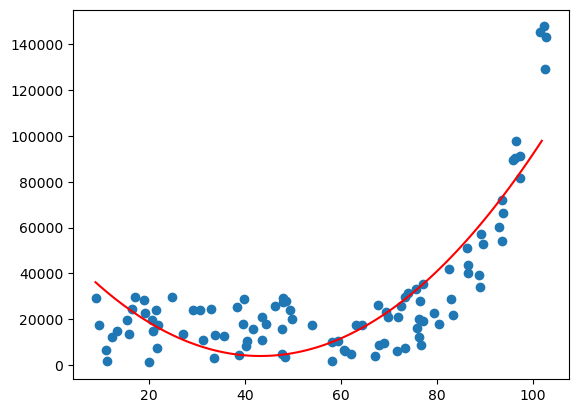

In [77]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [78]:
poly_2d.score(X_2, y)

0.7359753787024842

In [79]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [80]:
y = data.y
X = data.drop(["y"], axis=1)

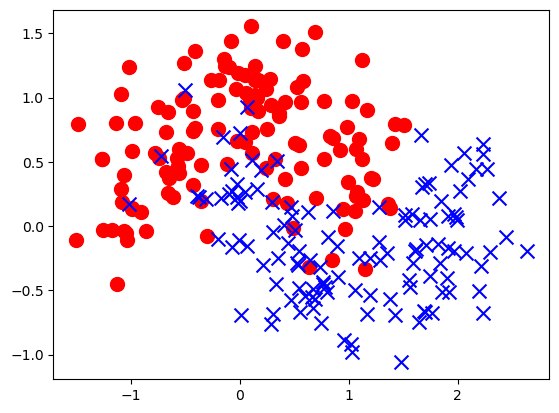

In [81]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logistic = LogisticRegression().fit(X, y)

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


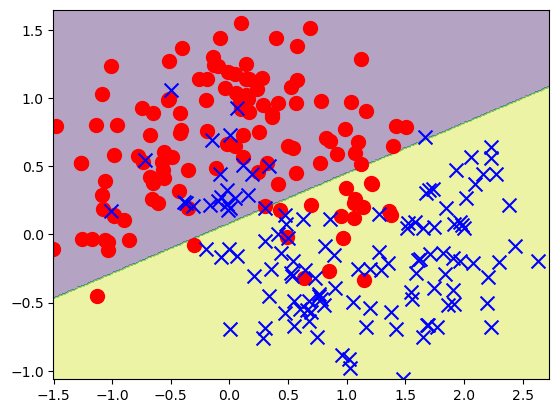

In [84]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [85]:
logistic.score(X, y)

0.832

In [86]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [87]:
X_3.shape

(250, 9)

In [88]:
class_3 = LogisticRegression().fit(X_3, y)

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


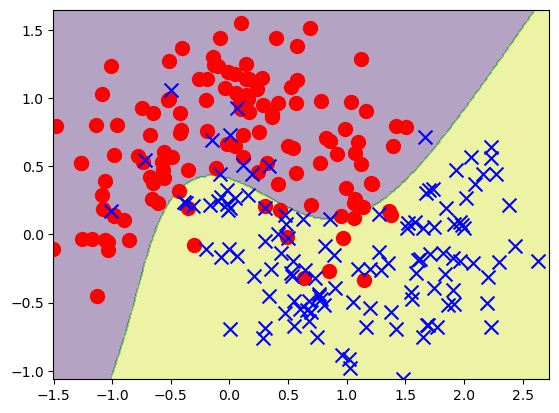

In [89]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [90]:
class_3.score(X_3, y)

0.9

In [91]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [92]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [93]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [94]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [95]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109157

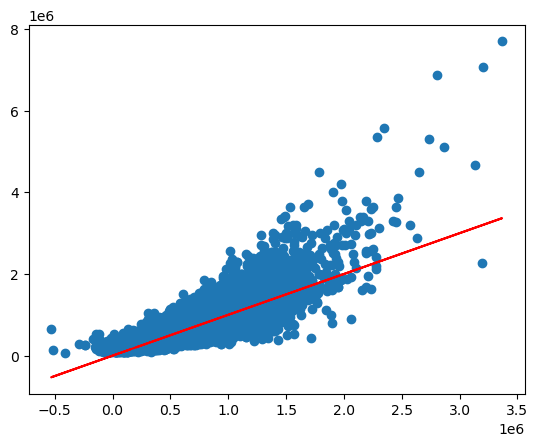

In [96]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [97]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [98]:
X_3_kc_prices.shape

(21613, 1330)

In [99]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8657582106850809

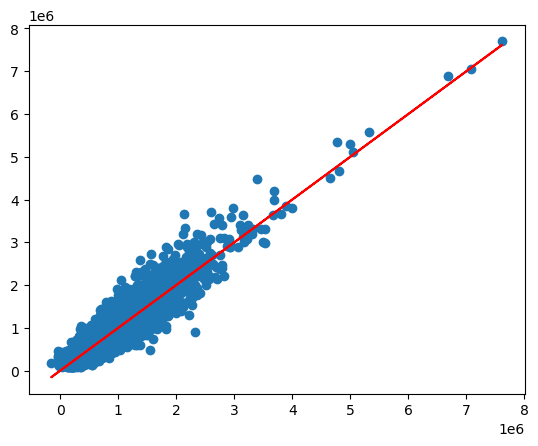

In [100]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Задания для самостоятельного выполнения

### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [184]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [185]:
X = data.x
y = data.y
X = pd.DataFrame(X)

In [186]:
import time

from sklearn.linear_model import LinearRegression
start_time = time.time()
linear = LinearRegression().fit(X, y)
elapsed_time1 = time.time() - start_time
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
linear.score(X, y)

r2_1 = linear.score(X, y)
print(r2_1)
print(f"Время выполнения: {elapsed_time1} секунд")

0.37467360318911636
Время выполнения: 0.0019817352294921875 секунд


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [187]:
from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)
start_time = time.time()
transformation.fit(X)
elapsed_time2 = time.time() - start_time
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
poly_2d.score(X_2, y)


r2_2 = poly_2d.score(X_2, y)
print(r2_2)
print(f"Время выполнения: {elapsed_time2} секунд")

0.7359753787024842
Время выполнения: 0.05310344696044922 секунд


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [188]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [189]:
y = data.y
X = data.drop(["y"], axis=1)

In [191]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logistic = LogisticRegression().fit(X, y)
elapsed_time3 = time.time() - start_time
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = logistic.predict(XX).reshape(xx.shape)
logistic.score(X, y)


r2_3 = logistic.score(X, y)
print(r2_3)
print(f"Время выполнения: {elapsed_time3} секунд")

0.832
Время выполнения: 0.0029914379119873047 секунд


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [192]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
start_time = time.time()
X_3 = class_transform.fit_transform(X)
elapsed_time4 = time.time() - start_time
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)
class_3.score(X_3, y)

r2_4 = class_3.score(X_3, y)
print(r2_4)
print(f"Время выполнения: {elapsed_time4} секунд")

0.9
Время выполнения: 0.0221254825592041 секунд


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [193]:
data = {'LinReg': [elapsed_time1],
        '(PolReg + LinReg)': [elapsed_time2],
        'LogReg': [elapsed_time3],
        '(PolReg + LogReg)': [elapsed_time4]}

df = pd.DataFrame(data, index=['time'])
df.loc['r2_score'] = [r2_1, r2_2, r2_3, r2_4]
df

,LinReg,(PolReg + LinReg),LogReg,(PolReg + LogReg)
time,0.001982,0.053103,0.002991,0.022125
r2_score,0.374674,0.735975,0.832000,0.900000


### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [112]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [113]:
X = pd.DataFrame(data.x)
y = data.y
X.shape, y.shape

((100, 1), (100,))

In [120]:
import time
def train_and_evaluate_model(X, y, degree):
    
    start_time = time.time()
    
    transformation = PolynomialFeatures(degree=degree)
    transformation.fit(X,y)
    X_transformed = transformation.transform(X)

    poly = LinearRegression().fit(X_transformed, y)
    score_ = poly.score(X_transformed, y)
    elapsed_time = time.time() - start_time
    
    xx = pd.DataFrame(np.linspace(min(X.x), max(X.x), 100))
    yy = linear.predict(xx)
    xx_pred = transformation.transform(xx)
    yy_pred = poly.predict(xx_pred)
    
    plt.scatter(X.x, y)
    plt.plot(xx, yy_pred, c='r')
    plt.title(f'Модель {degree} порядка')
    plt.show()
    
    # Анализ
    elapsed_time = time.time() - start_time
    r2 = poly.score(X_transformed, y)

    return elapsed_time, r2


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


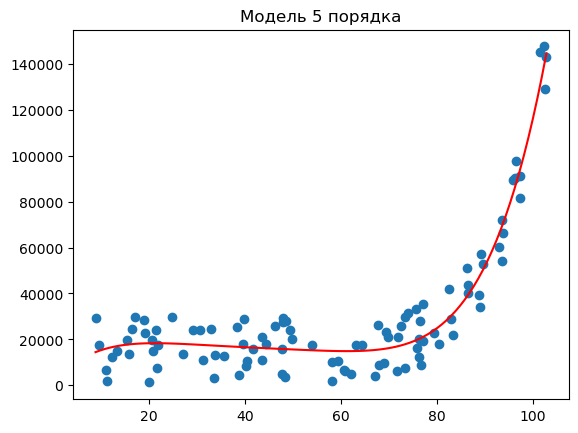

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


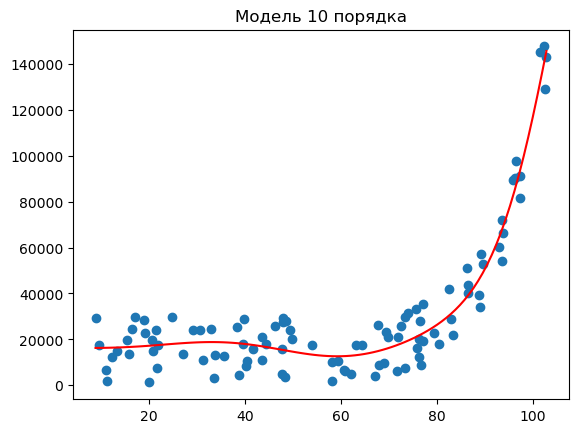

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


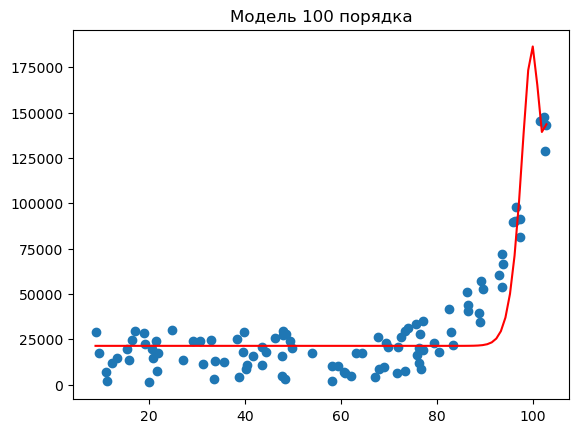

,Time,R2 Score
5,0.132155,0.921748
10,0.128655,0.9232
100,0.126661,0.791676


In [121]:
degrees = [5, 10, 100]

results = pd.DataFrame(index=degrees, columns=['Time', 'R2 Score'])

for degree in degrees:
    elapsed_time, r2 = train_and_evaluate_model(X, y, degree)
    results.loc[degree] = [elapsed_time, r2]

results

### 3. То же самое проделайте с датасетом для классификации и "King county".

In [131]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [132]:
y = data.y
X = data.drop(["y"], axis=1)
X.shape, y.shape

((250, 2), (250,))

In [197]:
def poly_classifier(X, y, dg):
    transformation = PolynomialFeatures(degree=dg, include_bias=False)
    X_ = transformation.fit_transform(X)

    start = time.time()
    logistic = LogisticRegression().fit(X_, y)
    time_ = time.time()-start
    score_ = logistic.score(X_, y)

    print(f'Порядок модели: {dg}')
    print(f'Время обучения: {time_}')
    print(f'score: {logistic.score(X_, y)}')

    xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
    XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

    Z = logistic.predict(transformation.transform(XX)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

    return [time_, score_]

Порядок модели: 5
Время обучения: 0.009943485260009766
score: 0.916


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


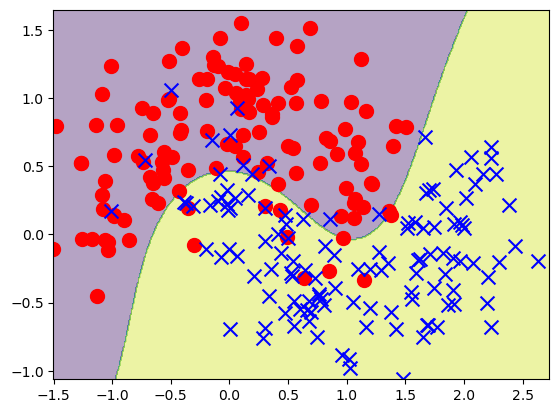

In [136]:
poly_classifier(X, y, 5)

Порядок модели: 10
Время обучения: 0.03191399574279785
score: 0.924


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


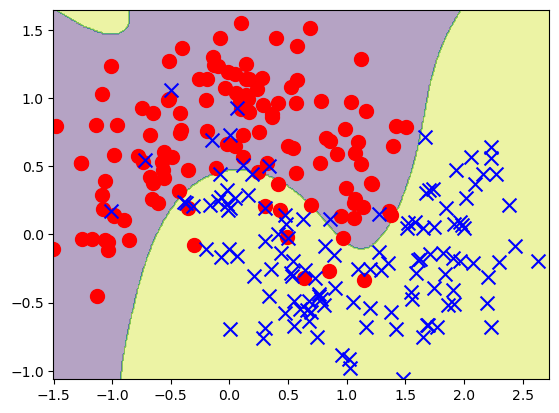

In [137]:
poly_classifier(X, y, 10)

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок модели: 100
Время обучения: 0.4909822940826416
score: 0.5


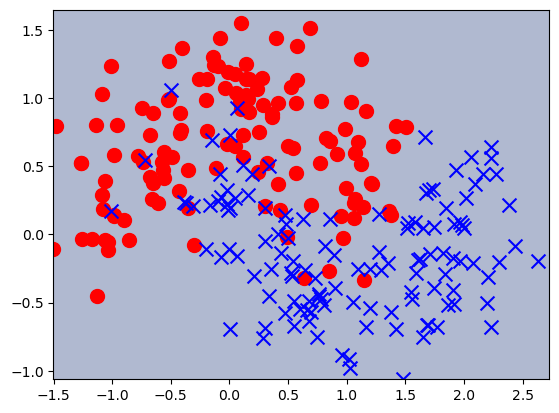

In [138]:
poly_classifier(X, y, 100)

In [139]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [140]:
y = data_kc_prices.price
X = data_kc_prices.drop(["id", "date", "price"], axis=1)
X.shape, y.shape

((21613, 18), (21613,))

In [148]:
def kc_classifier(X_kc_prices, y_kc_prices, dg):
    X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=dg)).fit_transform(X_kc_prices)

    start = time.time()
    reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
    time_ = time.time() - start
    score_ = reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

    print(f'Порядок модели: {dg}')
    print(f'Время обучения: {time_}')
    print(f'score: {score_}')

    y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
    plt.scatter(y_pred_kc_prices, y_kc_prices)
    plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
    plt.show()

    return [time_, score_]

Порядок модели: 2
Время обучения: 0.11569070816040039
score: 0.8288414654424276


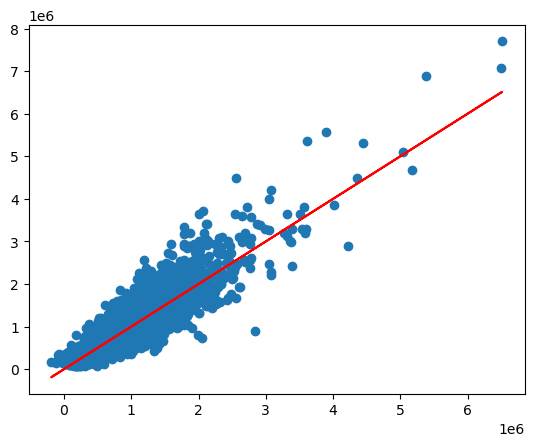

[0.11569070816040039, 0.8288414654424276]

In [149]:
kc_classifier(X_kc_prices, y_kc_prices, 2)

Порядок модели: 3
Время обучения: 3.035684585571289
score: 0.8657582106850809


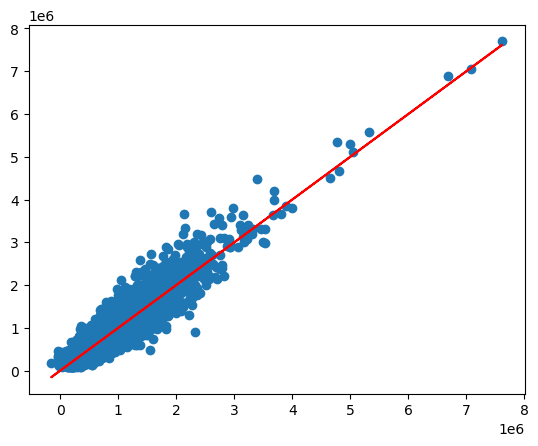

[3.035684585571289, 0.8657582106850809]

In [150]:
kc_classifier(X_kc_prices, y_kc_prices, 3)

### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


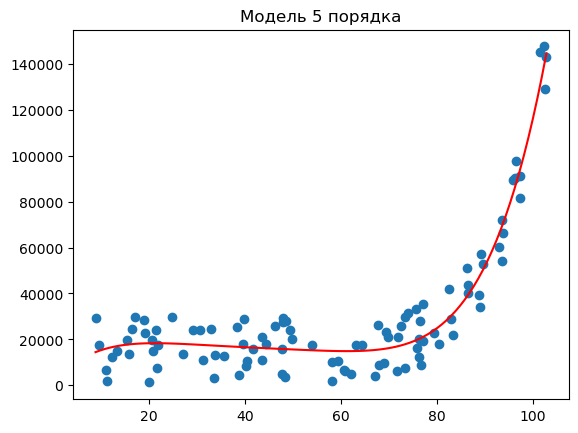

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


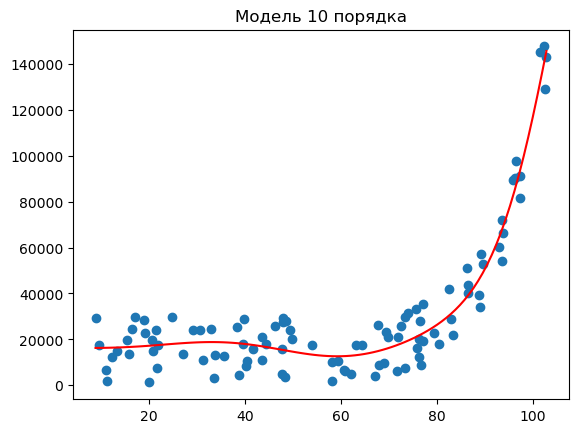

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


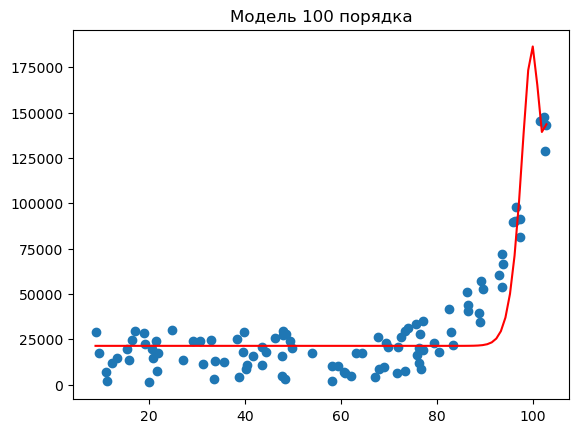

Порядок модели: 5
Время обучения: 0.007958412170410156
score: 0.916


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок модели: 10
Время обучения: 0.1132044792175293
score: 0.924


D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок модели: 100
Время обучения: 7.493908882141113
score: 0.5
Порядок модели: 2
Время обучения: 0.8259789943695068
score: 0.8288414654424276


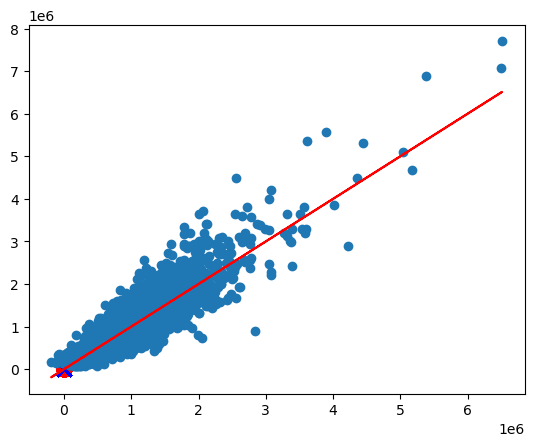

Порядок модели: 3
Время обучения: 4.084197282791138
score: 0.8657582106850809


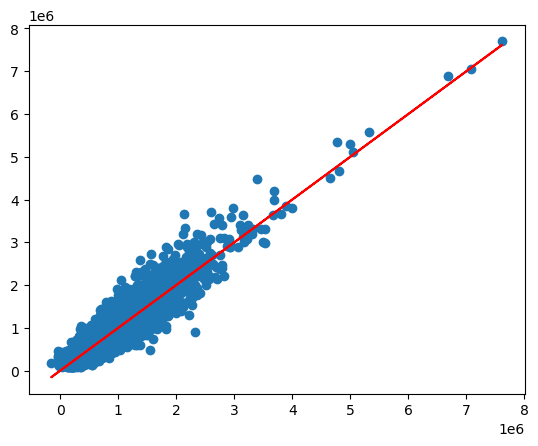

In [198]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                  index_col=0)
X = pd.DataFrame(data.x)
y = data.y
gen_reg_5 = train_and_evaluate_model(X, y, 5)
gen_reg_10 = train_and_evaluate_model(X, y, 10)
gen_reg_100 = train_and_evaluate_model(X, y, 100)

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
class_5 = poly_classifier(X, y, 5)
class_10 = poly_classifier(X, y, 10)
class_100 = poly_classifier(X, y, 100)

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
kc_2 = kc_classifier(X_kc_prices, y_kc_prices, 2)
kc_3 = kc_classifier(X_kc_prices, y_kc_prices, 3)

In [199]:
comp = {'gen_regression5': gen_reg_5,
         'gen_regression10': gen_reg_10,
         'gen_regression100':gen_reg_100,
         'gen_classiffication5': class_5,
         'gen_classiffication10': class_10,
         'gen_classiffication100': class_100,
         'king_country2': kc_2,
         'king_country3': kc_3,

         }
pd.DataFrame(comp, index=['Время', 'Score'])

,gen_regression5,gen_regression10,gen_regression100,gen_classiffication5,gen_classiffication10,gen_classiffication100,king_country2,king_country3
Время,0.249304,0.298202,0.237365,0.007958,0.113204,7.493909,0.825979,4.084197
Score,0.921748,0.923200,0.791676,0.916000,0.924000,0.500000,0.828841,0.865758


### 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [184]:
y = data_kc_prices.price
X = data_kc_prices.drop(["id", "date", "price"], axis=1)

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Регрессоры': feature_names, 'Коэффициенты': coefficients})
coefficients_df

,Регрессоры,Коэффициенты
0,bedrooms,-35766.541444
1,bathrooms,41144.278532
2,sqft_living,110.442865
3,sqft_lot,0.128598
4,floors,6689.550115
5,waterfront,582960.458423
6,view,52870.942384
7,condition,26385.649139
8,grade,95890.445151
9,sqft_above,70.785224


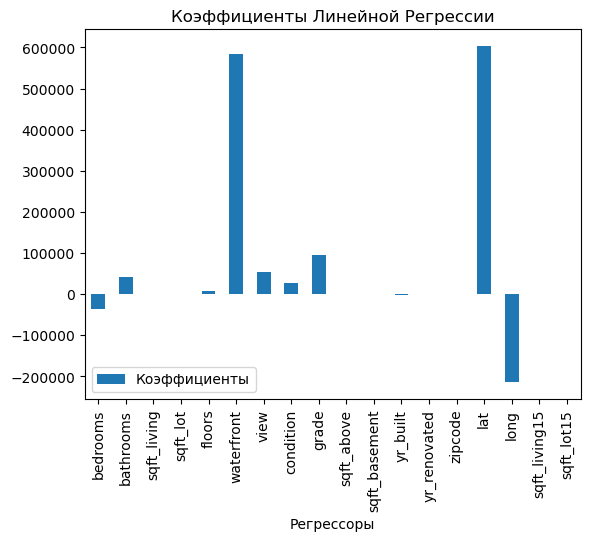

In [185]:
coefficients_df.plot.bar(x='Регрессоры', y='Коэффициенты', title='Коэффициенты Линейной Регрессии')
plt.show()

### 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [201]:
y = data_kc_prices.price
X = data_kc_prices.drop(["id", "date", "price"], axis=1)
X.shape, y.shape

((21613, 18), (21613,))

Интерпретация полиномиальной модели зависит от степени полинома и конкретных значений коэффициентов. Если степень полинома высока, может потребоваться более сложная интерпретация. Обычно, можно сказать, что коэффициенты более высоких степеней представляют важность взаимодействия между различными признаками, но интерпретация может быть более сложной.







Степень полинома: Высокая степень полинома может привести к переобучению модели. Если коэффициенты при высших степенях полинома большие, это может указывать на переобучение.

Значения коэффициентов: Знак коэффициента при признаке указывает на направление влияния этого признака на целевую переменную. Большие по модулю значения коэффициентов указывают на сильное влияние признака.

Взаимодействие между признаками: Если в модели присутствуют взаимодействия между различными признаками (например, x1 * x2), это может указывать на нелинейные зависимости между признаками.

Оценка важности: Оценка важности признаков может быть проведена с использованием стандартизированных коэффициентов. Это позволяет сравнивать влияние признаков в разных масштабах.

In [223]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline# для последовательного применения преобразований и моделей
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

coefficients = poly_model['linearregression'].coef_
feature_names = poly_model['polynomialfeatures'].get_feature_names(input_features=X.columns)

poly_coefficients_df = pd.DataFrame({'Attribute': feature_names, 'Coefficient': coefficients})

poly_coefficients_df[:19]

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attribute,Coefficient
0,1,-1.527230e+10
1,bedrooms,-3.252253e+03
2,bathrooms,1.638879e+04
3,sqft_living,5.335947e+12
4,sqft_lot,1.215437e+04
5,floors,-1.116288e+04
6,waterfront,-2.629825e+13
7,view,3.679457e+03
8,condition,2.413494e+04
9,grade,8.914162e+04


In [224]:
poly_coefficients_df.shape

(190, 2)

In [218]:
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [225]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline# для последовательного применения преобразований и моделей
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degree = 2
transformation = PolynomialFeatures(degree=degree)
transformation.fit(X_train,y_train)
X_transformed = transformation.transform(X_train)
poly = LinearRegression().fit(X_transformed, y_train)

coefficients = poly_model['linearregression'].coef_
feature_names = poly_model['polynomialfeatures'].get_feature_names(input_features=X.columns)

poly_coefficients_df = pd.DataFrame({'Attribute': feature_names, 'Coefficient': coefficients})

poly_coefficients_df[:19]

D:\AAct 3.8.3 Portable\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attribute,Coefficient
0,1,-1.527230e+10
1,bedrooms,-3.252253e+03
2,bathrooms,1.638879e+04
3,sqft_living,5.335947e+12
4,sqft_lot,1.215437e+04
5,floors,-1.116288e+04
6,waterfront,-2.629825e+13
7,view,3.679457e+03
8,condition,2.413494e+04
9,grade,8.914162e+04
